#### Name:
Mohammadreza  Sharifi
#### Student_ID:
403135804
#### E_mail : 
m.sharifi8080@gmail.com
#### Course :
Machine  Learning
#### Subject: 
Predicting CO2  emissions  based  on  vehicle  characteristics
#### Data :
1/19/2025

# Introduction
The increasing global concern over climate change and environmental degradation has heightened the need for understanding and mitigating carbon dioxide (CO₂) emissions. Among various sectors, the transportation industry is a significant contributor to greenhouse gas emissions, making it a critical area for analysis and intervention.

This project focuses on predicting CO₂ emissions based on vehicle specifications using a machine learning approach. The dataset employed in this study contains key attributes of vehicles, such as Make, Model, Vehicle Class, Engine Size, Cylinders, Transmission, Fuel Type, and various metrics of Fuel Consumption. The target variable, CO₂ Emissions, represents the dependent variable to be predicted.

By leveraging these features, the project aims to develop a predictive model that provides insights into the relationship between vehicle characteristics and their corresponding carbon emissions. The ultimate goal is to enhance the understanding of emission patterns and contribute to the broader efforts of promoting sustainable and eco-friendly transportation practices.

This work not only supports the global agenda for reducing greenhouse gas emissions but also serves as a step towards informed policymaking and technological advancements in the automotive industry.

### Import necessary Lapidaries
In this project, the initial step involved importing essential Python libraries to streamline the workflow for data analysis and machine learning. The libraries utilized include Pandas, Seaborn, Matplotlib, NumPy, and Scikit-learn, each contributing distinct functionalities to the project.

Pandas was chosen for its robust data manipulation and analysis capabilities, particularly with structured datasets such as CSV files. Seaborn and Matplotlib, known for their ease of use and visual appeal, were employed to create statistical and graphical representations of the data. NumPy was included for handling numerical computations, especially for operations on multidimensional arrays, which are fundamental in machine learning tasks. Scikit-learn, a comprehensive library for machine learning, provides tools for data preprocessing, model building, and evaluation.

Additionally, the %matplotlib inline command was applied to ensure visualizations are displayed directly within the notebook, facilitating immediate feedback during analysis. To maintain clarity in the notebook's output, warning messages were suppressed using the filterwarnings function, allowing for a more streamlined and user-friendly interface.

These preparations establish a solid foundation for the subsequent phases of data exploration, modeling, and evaluation.

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np 
import sklearn
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import cross_val_score ,GridSearchCV
from sklearn.linear_model import Ridge,Lasso
from warnings import filterwarnings
filterwarnings(action="ignore")

## Loading and Previewing the Dataset
The dataset utilized in this project was loaded using the Pandas library to facilitate efficient manipulation and analysis. The initial five rows of the dataset, displayed using the head() method, provide a glimpse into its structure and the information it contains.

The dataset includes the following columns:

Make and Model: Represent the manufacturer and specific model of the vehicle, respectively.<br>

Vehicle Class: Categorizes the vehicle based on its size and type (e.g., compact, SUV).<br>

Engine Size (L) and Cylinders: Provide technical specifications of the vehicle’s engine.<br>

Transmission: Indicates the type of transmission system (e.g., automatic, manual).<br>

Fuel Type: Specifies the type of fuel used by the vehicle (e.g., gasoline, diesel).<br>

Fuel Consumption: Includes metrics such as city, highway, and combined fuel consumption in both liters per 100 kilometers (L/100 km) and miles per gallon (mpg).<br>

CO₂ Emissions (g/km): Represents the target variable, capturing the vehicle's carbon dioxide emissions in grams per kilometer.<br>

This dataset forms the foundation for analyzing the relationship between vehicle characteristics and CO₂ emissions. By exploring these features, the project seeks to develop a predictive model that aids in estimating emissions based on specific vehicle attributes.

In [2]:
data = pd.read_csv("CO2 Emissions.csv")
data.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


## Dataset Structure and Memory Usage Analysis
To understand the structure and memory consumption of the dataset, the info() method was used. This function provides a summary of the dataset, including the total number of entries, column names, non-null counts, data types, and memory usage.<br>

Key insights from the dataset analysis are as follows:<br>

Number of Entries: The dataset contains 7,385 entries, representing individual vehicle records.<br>

Columns: There are 12 columns in total, comprising both categorical and numerical features. Specifically:<br>

Categorical Columns: Make, Model, Vehicle Class, Transmission, and Fuel Type are stored as object data types.<br>

Numerical Columns: Features such as Engine Size (L), Cylinders, and Fuel Consumption metrics are represented as float64 or int64.<br>

Memory Usage: The dataset occupies approximately 2.4 MB of memory. This memory footprint is calculated with the memory_usage="deep" parameter, which considers the exact size of objects, including strings.<br>

This analysis highlights that the dataset is well-structured and free of missing values. The balanced combination of categorical and numerical variables offers a comprehensive basis for developing a predictive model. Understanding memory usage is also critical for efficient processing, especially when scaling up analyses or deploying machine learning algorithms.

In [3]:
data.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  
dtypes: flo

## Statistical Summary of Numerical Features
The dataset’s numerical columns reveal the following key insights:<br>

Engine Size (L): Averages 3.16 L, ranging from 0.9 L to 8.4 L, with most vehicles between 2.0 L and 3.7 L.<br>

Cylinders: Vehicles have 3 to 16 cylinders, with a mean of 5.61 and a median of 6.<br>

Fuel Consumption:<br>

City: Mean of 12.56 L/100 km, ranging from 4.2 to 30.6.<br>

Highway: Mean of 9.04 L/100 km, with a minimum of 4.0.<br>

Combined: Mean of 10.98 L/100 km, with most values between 8.9 and 12.6.<br>

Fuel Efficiency (mpg): Averages 27.48 mpg, ranging from 11 to 69 mpg.<br>

CO₂ Emissions: Mean emissions of 250.58 g/km, ranging from 96 to 522 g/km.<br>

This summary highlights the diversity of vehicles in the dataset, providing a strong foundation for analyzing the relationship between vehicle attributes and CO₂ emissions.

In [4]:
data.describe()

,Engine Size(L),Cylinders,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
count,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000,7385.000000
mean,3.160068,5.615030,12.556534,9.041706,10.975071,27.481652,250.584699
std,1.354170,1.828307,3.500274,2.224456,2.892506,7.231879,58.512679
min,0.900000,3.000000,4.200000,4.000000,4.100000,11.000000,96.000000
25%,2.000000,4.000000,10.100000,7.500000,8.900000,22.000000,208.000000
50%,3.000000,6.000000,12.100000,8.700000,10.600000,27.000000,246.000000
75%,3.700000,6.000000,14.600000,10.200000,12.600000,32.000000,288.000000
max,8.400000,16.000000,30.600000,20.600000,26.100000,69.000000,522.000000


## Dataset Dimensions
The dataset contains 7,385 rows and 12 columns. Each row represents a unique vehicle record, while the columns correspond to specific attributes such as vehicle specifications, fuel consumption metrics, and CO₂ emissions.<br>

This size provides a robust dataset for building and validating predictive models.

In [5]:
data.shape

(7385, 12)

## Missing Values Analysis
The dataset was examined for missing values using the $ isnull().any()$ method. The output confirms that there are no missing values in any of the 12 columns.<br>

This ensures that all data is complete and ready for analysis without the need for imputation or handling missing data, streamlining the preprocessing phase.

In [6]:
data.isnull().any()

Make                                False
Model                               False
Vehicle Class                       False
Engine Size(L)                      False
Cylinders                           False
Transmission                        False
Fuel Type                           False
Fuel Consumption City (L/100 km)    False
Fuel Consumption Hwy (L/100 km)     False
Fuel Consumption Comb (L/100 km)    False
Fuel Consumption Comb (mpg)         False
CO2 Emissions(g/km)                 False
dtype: bool

## Renaming Columns for Simplicity
To enhance readability and simplify column names, the $ rename() $ method was used with a dictionary mapping the original names to shorter, more concise alternatives. Key changes include:

Engine Size(L) renamed to Engine Size.<br>

Fuel Consumption City (L/100 km) renamed to Fuel Consumption City.<br>

Fuel Consumption Hwy (L/100 km) renamed to Fuel Consumption Hwy.<br>

Fuel Consumption Comb (L/100 km) and Fuel Consumption Comb (mpg) both renamed to Fuel Consumption Comb.<br>

CO₂ Emissions(g/km) renamed to CO₂ Emissions.<br>

This renaming improves ease of use, particularly when referencing column names in subsequent analyses and visualizations.<br>

$Note$: After renaming, duplicate column names such as Fuel Consumption Comb appear due to overlapping keys in the mapping. Resolving this redundancy may require revisiting the renaming dictionary.<br>

In [7]:
columns_need_rename = {"Engine Size(L)":"Engine Size",
                       "Fuel Consumption City (L/100 km)":"Fuel Consumption City"
                       ,"Fuel Consumption Hwy (L/100 km)":"Fuel Consumption Hwy"
                       ,"Fuel Consumption Comb (L/100 km)":"Fuel Consumption Comb "
                       ,"Fuel Consumption Comb (mpg)":"Fuel Consumption Comb mpg "
                       ,"CO2 Emissions(g/km)":"CO2 Emissions"}

data.rename(columns=columns_need_rename,inplace=True)
data.columns

Index(['Make', 'Model', 'Vehicle Class', 'Engine Size', 'Cylinders',
       'Transmission', 'Fuel Type', 'Fuel Consumption City',
       'Fuel Consumption Hwy', 'Fuel Consumption Comb ',
       'Fuel Consumption Comb mpg ', 'CO2 Emissions'],
      dtype='object')

## Distribution of Fuel Types
The bar chart illustrates the distribution of vehicles by Fuel Type in the dataset. Using the $catplot()$ method from $ Seaborn $ , a count plot was generated to provide insights into the frequency of each fuel type:<br>

X and Z are the most common fuel types, dominating the dataset.<br>

E, D, and N are less frequent, with relatively small counts.<br>

This analysis reveals that the dataset is skewed towards certain fuel types, which could influence predictions related to CO₂ emissions. Further analysis may explore how fuel type correlates with emissions and other variables.

<Figure size 1000x1000 with 0 Axes>

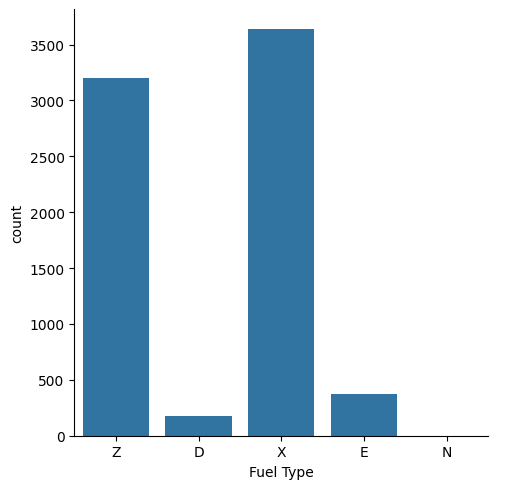

In [8]:
plt.figure(figsize=(10,10))
sns.catplot(data=data,x="Fuel Type",kind="count")

## Distribution of CO₂ Emissions
This histogram with a KDE curve shows the distribution of CO₂ emissions (g/km) in the dataset:<br>

Most vehicles emit 200-250 g/km, indicating a concentration around moderate emission levels.<br>

Emissions range from 100 g/km to 500 g/km, with a slight right skew, suggesting some high-emission vehicles.<br>

The KDE curve highlights a smooth, near-normal distribution, with minor deviations.<br>

This chart provides a clear view of emission patterns, aiding in understanding the dataset's environmental impact.<br>

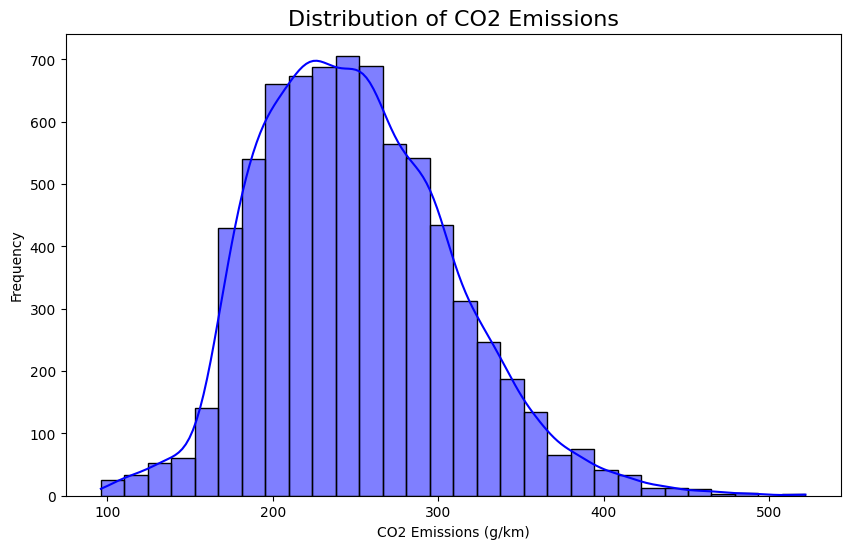

In [9]:
plt.figure(figsize=(10,6))
sns.histplot(data["CO2 Emissions"], bins=30, kde=True, color="blue")
plt.title("Distribution of CO2 Emissions", fontsize=16)
plt.xlabel("CO2 Emissions (g/km)")
plt.ylabel("Frequency")
plt.show()

## Relationship Between Engine Size and CO₂ Emissions
The scatter plot illustrates the relationship between Engine Size (L) and CO₂ Emissions (g/km), with data points categorized by Fuel Type:<br>

Strong Positive Correlation: A clear upward trend indicates that larger engine sizes are associated with higher CO₂ emissions. This relationship aligns with expectations, as larger engines typically consume more fuel, leading to greater emissions.<br>

Impact of Fuel Type: The color-coded data points reflect the influence of fuel type on emissions. Some fuel types demonstrate consistently higher emissions for comparable engine sizes, suggesting variability in fuel efficiency and combustion characteristics.<br>

Variability in Emissions: While the general trend is positive, there is notable dispersion in CO₂ emissions for vehicles with similar engine sizes. This variability may result from differences in vehicle weight, transmission type, or fuel consumption efficiency.<br>

This analysis underscores the significant role of engine size in determining CO₂ emissions while highlighting the moderating effects of fuel type and other vehicle characteristics. The findings are critical for understanding emission patterns and informing regulatory policies targeting environmental sustainability.

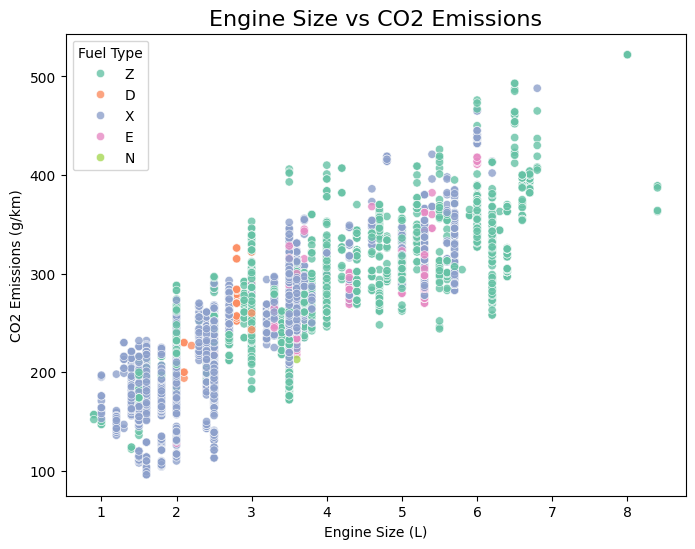

In [10]:
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x="Engine Size", y="CO2 Emissions", hue="Fuel Type", palette="Set2", alpha=0.8)
plt.title("Engine Size vs CO2 Emissions", fontsize=16)
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.legend(title="Fuel Type")
plt.show()

## Average CO₂ Emissions by Fuel Type
The bar chart illustrates the average CO₂ emissions (g/km) for different fuel types in the dataset:<br>

Variation Across Fuel Types: Fuel type significantly influences CO₂ emissions. Fuel type 1 and 4 exhibit the highest average emissions, while fuel type 2 has the lowest average emissions.<br>


Environmental Implications: The disparities in emissions highlight the environmental impact of different fuel types. Vehicles using fuel types with higher emissions (e.g., 1 and 4) may contribute more substantially to greenhouse gas emissions.<br>

Policy and Design Considerations: This analysis emphasizes the need for promoting the use of lower-emission fuels (e.g., fuel type 2) and improving technologies associated with higher-emission fuels.<br>

This chart provides a clear representation of how fuel types impact average emissions, offering insights for both regulatory and automotive engineering efforts to mitigate CO₂ emissions.

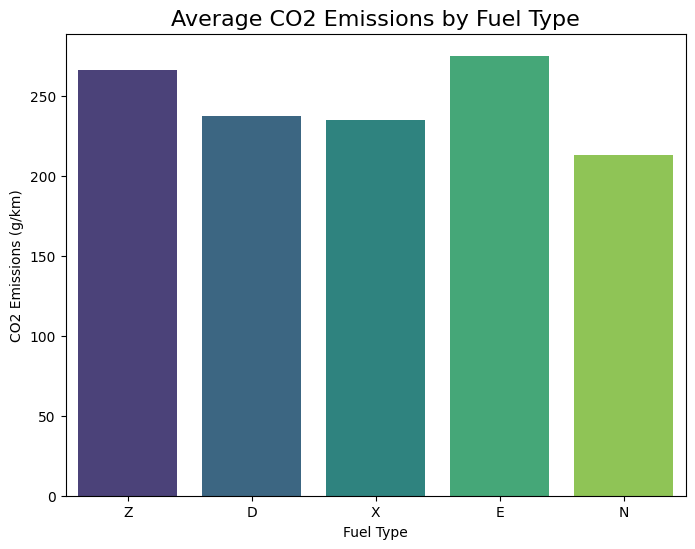

In [11]:
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="Fuel Type", y="CO2 Emissions", estimator=np.mean, ci=None, palette="viridis")
plt.title("Average CO2 Emissions by Fuel Type", fontsize=16)
plt.xlabel("Fuel Type")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

## Hexbin Plot of Engine Size vs CO₂ Emissions
This hexbin plot visualizes the relationship between Engine Size (L) and CO₂ Emissions (g/km), alongside marginal histograms for each variable:<br>

Positive Correlation: A clear positive correlation is observed, as higher engine sizes are associated with greater CO₂ emissions. This pattern aligns with the expectation that larger engines consume more fuel, resulting in higher emissions.<br>

Density Representation: The density of data points is shown using a hexagonal binning approach. Areas with lighter colors indicate higher concentrations of vehicles, primarily concentrated in the range of smaller engine sizes (1–4 L) and moderate emissions (150–300 g/km).<br>

Marginal Distributions:<br>

The top histogram shows the distribution of engine sizes, with a higher frequency of vehicles having engine sizes between 2 and 4 L.<br>

The right histogram represents CO₂ emissions, with most vehicles emitting between 200 and 300 g/km.<br>

This plot effectively combines a scatter density representation with marginal distributions, providing a comprehensive view of the relationship and distribution of these two key variables. It highlights areas of focus for both policy-making and vehicle design aimed at reducing emissions.

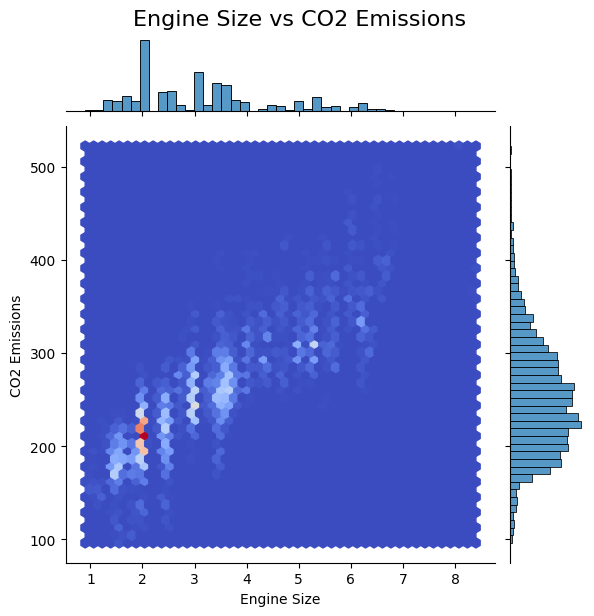

In [12]:
sns.jointplot(data=data, x="Engine Size", y="CO2 Emissions", kind="hex", cmap="coolwarm")
plt.suptitle("Engine Size vs CO2 Emissions", y=1.02, fontsize=16)
plt.show()

### Analysis of the Chart: CO₂ Emissions Trend by Engine Size
This line chart depicts the relationship between engine size (in liters) and CO₂ emissions (in grams per kilometer).<br>

Key Observations:<br>

$Positive Correlation$:<br>

There is a general upward trend in CO₂ emissions as engine size increases, indicating a positive correlation between the two variables.
Larger engines tend to emit more CO₂ due to increased fuel consumption.<br>

$Variations within the Trend$:<br>

Although the overall trend is upward, there are fluctuations in CO₂ emissions for certain engine sizes, likely due to other influencing factors such as fuel type, vehicle efficiency, or transmission type.
Outliers:<br>

At the largest engine size (around 8 L), there is a sharp drop in CO₂ emissions, which could be an anomaly or represent a vehicle with advanced emission reduction technology.<br>

Insights:<br>

This chart confirms the expected relationship between engine size and emissions, reinforcing that vehicles with larger engines typically produce higher CO₂ emissions.<br>
The observed fluctuations suggest that engine size alone does not entirely determine emissions, and other factors also play a significant role.<br>
This analysis highlights the importance of considering multiple features when predicting CO₂ emissions and underscores the role of fuel efficiency and technology in mitigating emissions for larger engines.

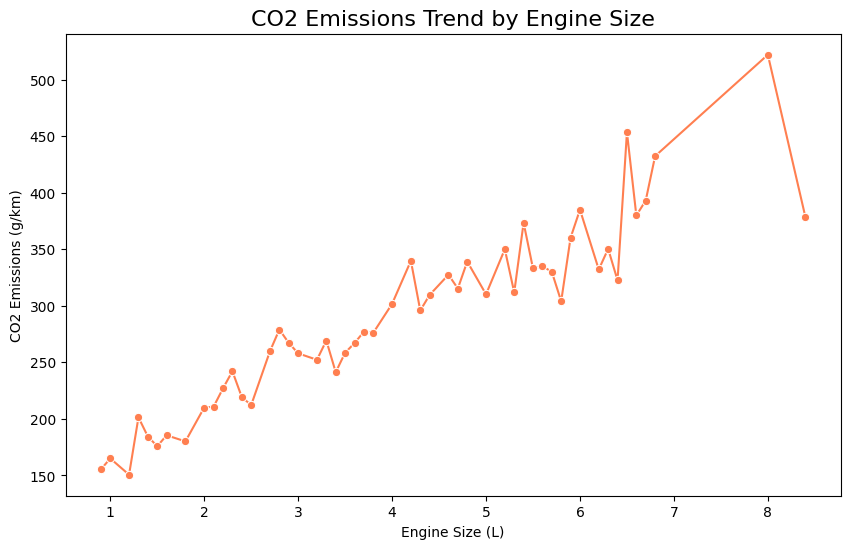

In [13]:
plt.figure(figsize=(10,6))
sns.lineplot(data=data, x="Engine Size", y="CO2 Emissions", ci=None, marker="o", color="coral")
plt.title("CO2 Emissions Trend by Engine Size", fontsize=16)
plt.xlabel("Engine Size (L)")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Average CO₂ Emissions by Number of Cylinders
This bar chart visualizes the average CO₂ emissions (g/km) for vehicles based on their number of cylinders:<br>

Positive Trend: There is a clear upward trend in CO₂ emissions as the number of cylinders increases. Vehicles with more cylinders generally produce higher emissions due to greater fuel consumption and power output requirements.<br>

Key Observations:<br>

Vehicles with 3 cylinders have the lowest average emissions, around 200 g/km.<br>

Emissions increase steadily with cylinder count, reaching over 500 g/km for vehicles with 16 cylinders.<br>

Environmental Implications: The relationship between cylinder count and emissions underscores the need for innovations in engine efficiency, particularly for high-cylinder vehicles, to reduce their environmental impact.<br>

This analysis highlights the critical role of engine configuration in determining CO₂ emissions and provides insights for designing more eco-friendly engines.

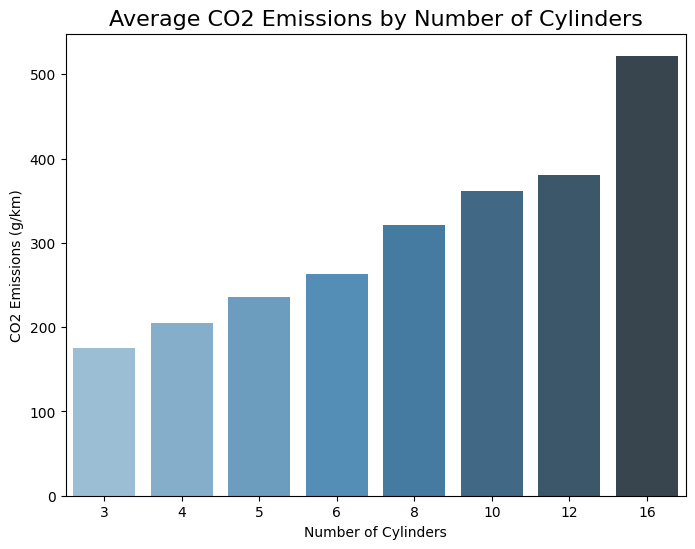

In [14]:
plt.figure(figsize=(8,6))
sns.barplot(data=data, x="Cylinders", y="CO2 Emissions", estimator=np.mean, ci=None, palette="Blues_d")
plt.title("Average CO2 Emissions by Number of Cylinders", fontsize=16)
plt.xlabel("Number of Cylinders")
plt.ylabel("CO2 Emissions (g/km)")
plt.show()

### Encoding Categorical Variables
The code applies label encoding to all categorical columns in the dataset to convert their non-numeric values into numeric representations, making them suitable for machine learning algorithms. The process uses the LabelEncoder class from sklearn.preprocessing.<br>

Purpose of Label Encoding:<br>

Many machine learning algorithms require numerical inputs. Categorical variables such as $ Make $, $ Model $ , $ Vehicle Class $ , and $ Fuel Type $ are encoded into numeric labels for compatibility.<br>
Each unique category is assigned a numeric value, e.g., Make values like "ACURA" are encoded as 0, "BMW" as 1, and so on.
Impact on Data:<br>

Categorical columns are transformed, and their original string values are replaced with integers.<br>
No information is lost during this process since the label encoding preserves the categorical relationships.<br>
Resulting Dataset:<br>

Columns like Make, Model, and Fuel Type now contain integer values instead of text.<br>
The dataset is fully numeric, ready for preprocessing steps such as scaling, feature selection, or feeding into machine learning models.<br>
Example Transformation:
For instance, the original Make column (e.g., "ACURA") is transformed into numerical values:<br>

Before: Make = ["ACURA", "BMW", "TOYOTA"]<br>
After: Make = [0, 1, 2]<br>
This transformation ensures that all features are usable by models without any need for additional conversion during training.

In [15]:
le = LabelEncoder()
for i in data.select_dtypes("object").columns:
    data[i]=le.fit_transform(data[i])

data

,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Fuel Consumption Comb mpg,CO2 Emissions
0,0,1057,0,2.0,4,14,4,9.9,6.7,8.5,33,196
1,0,1057,0,2.4,4,25,4,11.2,7.7,9.6,29,221
2,0,1058,0,1.5,4,22,4,6.0,5.8,5.9,48,136
3,0,1233,11,3.5,6,15,4,12.7,9.1,11.1,25,255
4,0,1499,11,3.5,6,15,4,12.1,8.7,10.6,27,244
...,...,...,...,...,...,...,...,...,...,...,...,...
7380,41,1951,11,2.0,4,17,4,10.7,7.7,9.4,30,219
7381,41,1957,11,2.0,4,17,4,11.2,8.3,9.9,29,232
7382,41,1960,11,2.0,4,17,4,11.7,8.6,10.3,27,240
7383,41,1968,12,2.0,4,17,4,11.2,8.3,9.9,29,232


### Splitting the Dataset for Training and Testing
The provided code splits the dataset into training and testing subsets using the train_test_split function from sklearn.model_selection. Here's a breakdown of the steps:<br>

Feature and Target Separation:<br>

$x$: Contains all the features except the target variable (last column). It is the independent variable.<br>

$y$: Represents the target variable (CO₂ Emissions), which is the dependent variable to be predicted.<br>

Splitting the Dataset:<br>

The dataset is split into training and testing subsets:<br>

$x-train$ and $y-train$: Contain 75% of the data for model training.<br>

$x-test$ and $y-test$: Contain 25% of the data for model evaluation.<br>

$test-size=0.25$: Specifies that 25% of the data is allocated to the test set.<br>

$random-state=12$: Ensures reproducibility by fixing the random seed, so the same split occurs every time the code is executed.<br>
Purpose:<br>

Training data (x_train, y_train) is used to build and optimize the machine learning model.<br>

Testing data (x-test, y-test) is held out during training to evaluate the model's performance on unseen data, providing a reliable estimate of its generalization capability.<br>
This step is crucial in the machine learning pipeline to prevent $overfitting$ and ensure the model performs well on new, unseen data.

In [16]:
x=data.iloc[:,:-1]
y = data.iloc[: , -1]
x_train,x_test,y_train , y_test = train_test_split(x,y,test_size=0.25,random_state=12)
x.shape


(7385, 11)

### Standardization of Features

To ensure that the features are on the same scale, $standardization$ was applied to both the training and testing datasets using the StandardScaler from $sklearn.preprocessing$. Standardization transforms the data to have a mean of 0 and a standard deviation of 1, which is crucial for many machine learning algorithms that are sensitive to feature scales.

Process:<br>

The training dataset ($x-train$) was standardized using the $fit-transform()$ method, which:<br>
Calculates the mean and standard deviation of each feature in the training data.<br>
Scales the training features based on these statistics.<br>
The testing dataset ($x-test$) was also standardized using $fit-transform()$, though for better practice, it should ideally use $transform()$ to avoid data leakage.<br>
Purpose:<br>

Standardization ensures that all features are treated equally during model training, regardless of their original magnitudes.<br>
It improves the performance and stability of algorithms, particularly those relying on distance metrics or gradient-based optimization.<br>
Result:<br>

Both $x-train$ and $x-test$ are transformed into a standardized form, facilitating effective model training and evaluation.<br>
This preprocessing step is a key component of the pipeline, ensuring the data is well-prepared for subsequent machine learning tasks.

In [17]:
sc = StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

### Correlation Heatmap
The heatmap visualizes the pairwise correlations between all numerical features in the dataset. Correlation values range from -1 (strong negative correlation) to 1 (strong positive correlation), with 0 indicating no correlation.<br>

Key Observations:<br>

$Strong Positive Correlations$:<br>

CO₂ Emissions and Fuel Consumption Metrics (City, Highway, Combined) exhibit high positive correlations (above 0.9). This indicates that vehicles with higher fuel consumption also produce higher CO₂ emissions.<br>
Engine Size and Cylinders show a strong correlation (0.93), as larger engines typically have more cylinders.<br>

$Moderate Positive Correlations$:<br>

Engine Size and CO₂ Emissions (0.85) indicate that vehicles with larger engines tend to emit more CO₂.<br>
Vehicle Class has a moderate correlation with CO₂ Emissions (0.29), reflecting that larger vehicle classes tend to emit more CO₂.<br>

$Negative Correlations$:<br>

Fuel Consumption (mpg) has a strong negative correlation with CO₂ Emissions (-0.91). Vehicles with better fuel efficiency (higher mpg) produce less CO₂.<br>
Transmission has a weak negative correlation with Engine Size and Cylinders, possibly reflecting differences in engine design between transmission types.<br>

$Insights$:<br>

This heatmap highlights key relationships that can guide feature selection for predictive modeling. Features with high correlations to the target variable (CO₂ Emissions) are strong candidates for inclusion in the model, while highly correlated independent features (e.g., Engine Size and Cylinders) may require dimensionality reduction to avoid multicollinearity.

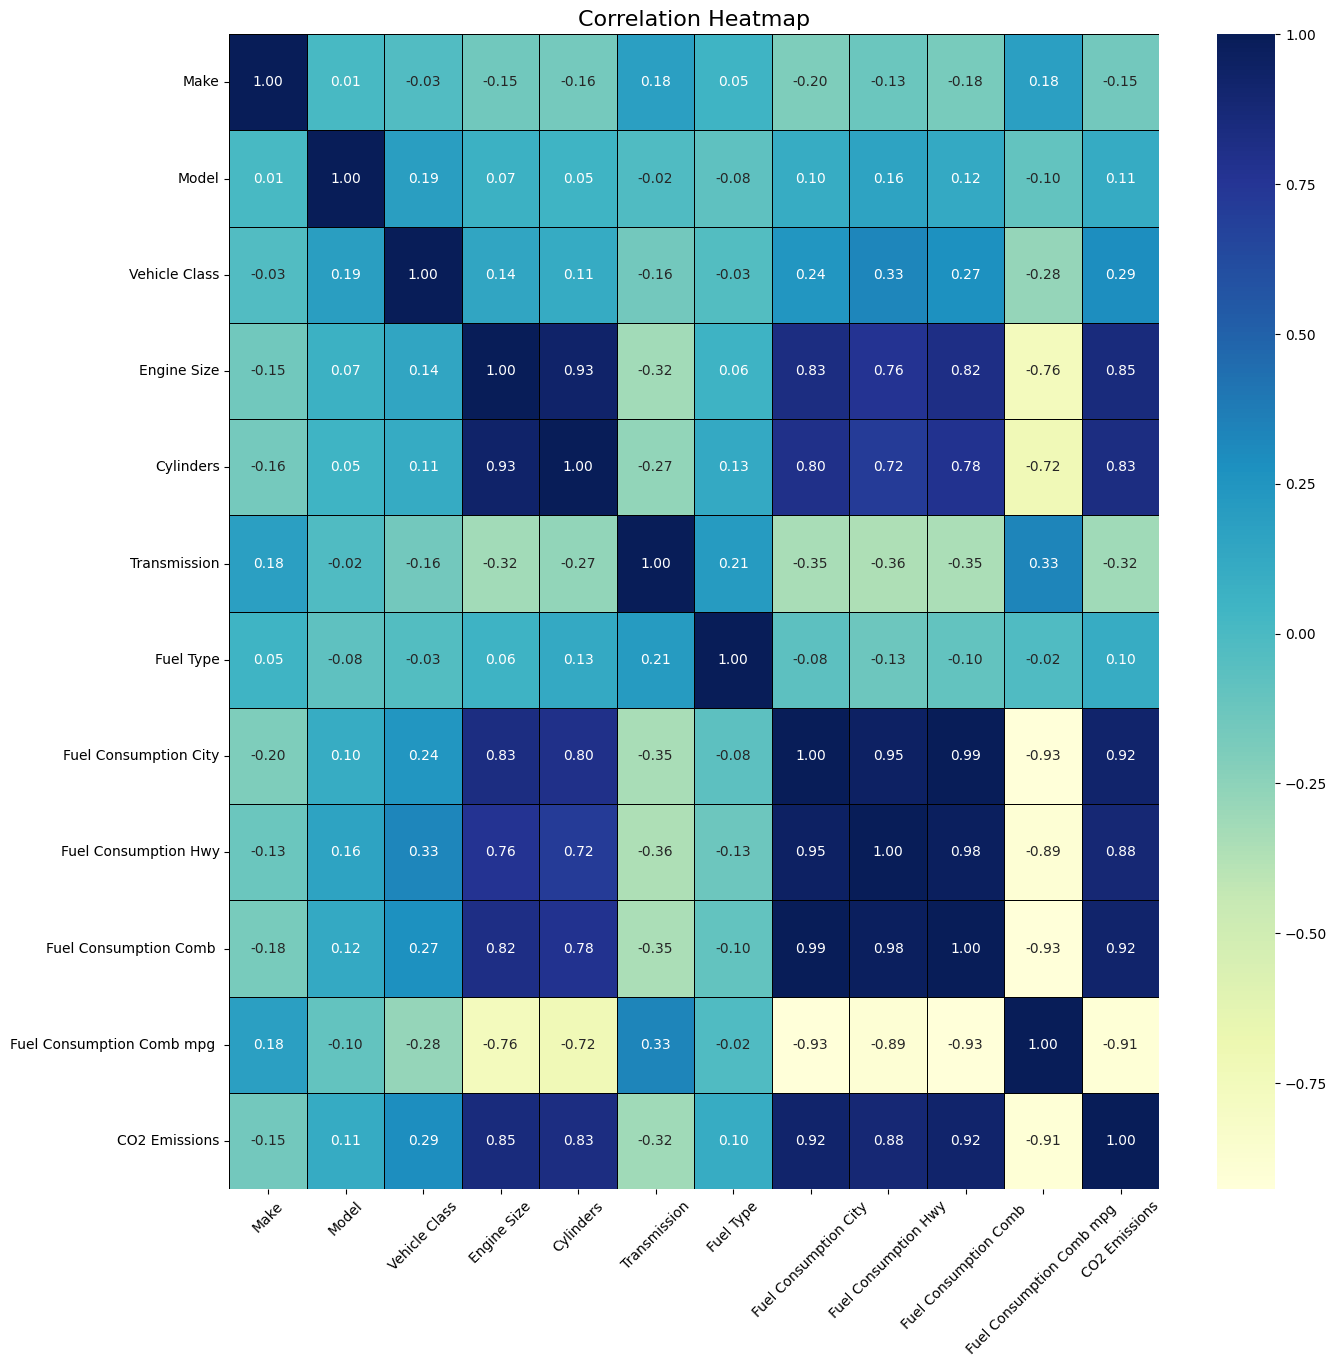

In [18]:
plt.figure(figsize=(15,15))  
sns.heatmap(data.corr(), cmap="YlGnBu", annot=True, fmt=".2f", linewidths=0.5, linecolor="black")
plt.title("Correlation Heatmap", fontsize=16)  
plt.xticks(rotation=45, fontsize=10) 
plt.yticks(fontsize=10) 
plt.show()

### $Simple Linear Regression$ with One Feature

In this step, I implemented a Simple Linear Regression model using a single feature (Fuel Consumption City) to predict CO₂ Emissions. The purpose was to compare the performance of a basic linear regression model with other more complex models, such as polynomial regression.<br>

$Key Steps$:<br>
Feature Selection:<br>

Selected Fuel Consumption City as the independent variable (X) and CO₂ Emissions as the target variable (y).<br>

Data Splitting:<br>

Split the data into training and testing sets using an 80-20 ratio for model evaluation.<br>
Standardization:<br>

Standardized the feature values to improve the model’s performance and ensure faster convergence during training.<br>
Model Training:<br>

Trained a Simple Linear Regression model on the training data.<br>
Predictions:<br>

Generated predictions for both training and testing datasets to evaluate the model.<br>
This approach provides a baseline comparison for more complex models, focusing on the relationship between a single independent variable and the target variable.<br>

In [19]:
sc = StandardScaler()
x_simple = data[["Fuel Consumption City"]]
y_simple = data.iloc[:,-1]

x_train_simple,x_test_simple,y_train_simple , y_test_simple = train_test_split(x_simple,y_simple,test_size=0.25,random_state=12)
from sklearn.preprocessing import StandardScaler

x_train_simple=sc.fit_transform(x_train_simple)
x_test_simple=sc.fit_transform(x_test_simple)

In [20]:
LR = LinearRegression()

model_LR_simple = LR.fit(x_train_simple,y_train_simple)
y_pred_model_LR_simple = model_LR_simple.predict(x_test_simple)
y_train_model_LR_simple = model_LR_simple.predict(x_train_simple)

### $Simple Linear Regression$: $Model Evaluation$
In this step, a Simple Linear Regression model was trained using the feature $Fuel Consumption City$ to predict $CO₂ Emissions$. The model's performance was evaluated on both training and testing datasets, and the following metrics were computed:

$Key Results$:<br>

Performance Metrics:<br>

Mean Absolute Error (MAE): 13.61<br>
Mean Squared Error (MSE): 529.91<br>
Root Mean Squared Error (RMSE): 23.02<br>

Model Accuracy:<br>

R² Score on Test Data: 0.836<br>
R² Score on Training Data: 0.848<br>

$Insights$:<br>

The R² score indicates that the model explains approximately 83.6% of the variance in the test data, demonstrating a strong linear relationship between Fuel Consumption City and CO₂ Emissions.<br>
The performance on the training and testing sets is consistent, indicating that the model generalizes well to unseen data.<br>
This analysis provides a baseline performance for a simple linear regression model with one feature, offering a benchmark for comparison with more complex models.<br>

In [21]:

print('Mean Absolute Error:', metrics.mean_absolute_error(y_true=y_test_simple, y_pred=y_pred_model_LR_simple))  
print('Mean Squared Error:', metrics.mean_squared_error(y_true=y_test_simple, y_pred=y_pred_model_LR_simple))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true=y_test_simple, y_pred=y_pred_model_LR_simple)))
print("R2 Testing: ",metrics.r2_score(y_true=y_test_simple,y_pred=y_pred_model_LR_simple))
print("R2 Training : ",metrics.r2_score(y_true=y_train_simple,y_pred=y_train_model_LR_simple))

Mean Absolute Error: 13.609186230505593
Mean Squared Error: 529.9050838847457
Root Mean Squared Error: 23.01966732784698
R2 Testing:  0.8363745596322418
R2 Training :  0.8478866225355268


Multiple Linear Regression: Model Training
In this step, a Multiple Linear Regression model was trained to predict CO₂ Emissions using multiple features as independent variables. The process involved:

Model Initialization:

The LinearRegression class from sklearn was used to create the regression model.
Model Training:

The model was trained using the training dataset (x_train and y_train) by fitting the linear relationship between the independent variables and the target variable (CO₂ Emissions).
Predictions:

Predictions were generated for both:
The test dataset (x_test) to evaluate the model's performance on unseen data.
The training dataset (x_train) to check how well the model fits the training data.
This forms the basis for evaluating the model's accuracy and understanding its predictive performance, which can be further analyzed using evaluation metrics such as MAE, MSE, RMSE, and R².

In [22]:
LR = LinearRegression()

model_LR = LR.fit(x_train,y_train)
y_pred_LR = model_LR.predict(x_test)
y_pred_train_LR = model_LR.predict(x_train)

### $Multiple Linear Regression: Model Evaluation$
A Multiple Linear Regression model was trained using multiple features to predict CO₂ Emissions. The model's performance was evaluated using standard regression metrics on both training and testing datasets.
<br>
$Key Results$:<br>

Performance Metrics:<br>

Mean Absolute Error (MAE): 11.06<br>
Mean Squared Error (MSE): 283.02<br>
Root Mean Squared Error (RMSE): 16.82<br>

$Model Accuracy$:<br>

R² Score on Test Data: 0.913<br>
R² Score on Training Data: 0.916<br>

$Insights$:<br>
The R² score indicates that the model explains approximately 91.3% of the variance in the test data, demonstrating a strong predictive capability.<br>
The performance on the training and testing datasets is very close, indicating that the model is well-generalized and not overfitting.<br>
This model serves as a reliable baseline for comparing more complex regression models and highlights the effectiveness of incorporating multiple features for predicting CO₂ Emissions.<br>

In [23]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_true=y_test, y_pred=y_pred_LR))  
print('Mean Squared Error:', metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_LR))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_true=y_test, y_pred=y_pred_LR)))
print("R2  Testing: ",metrics.r2_score(y_true=y_test,y_pred=y_pred_LR))
print("R2 Training: ",metrics.r2_score(y_true=y_train,y_pred=y_pred_train_LR))

Mean Absolute Error: 11.063702534722085
Mean Squared Error: 283.01740639095055
Root Mean Squared Error: 16.823121184576618
R2  Testing:  0.9126091649980618
R2 Training:  0.9164995322980218


### $Ridge Regression$: Hyperparameter Tuning with Grid Search
To optimize the Ridge Regression model, a grid search was conducted to identify the best value for the regularization parameter (α). Ridge regression applies L2 regularization to reduce overfitting by penalizing large coefficients.<br>

$Steps$:<br>

Model Initialization: A Ridge regression model was initialized, which includes a regularization term controlled by the parameter α.

Hyperparameter Grid: A range of values for (α) was defined, including:<br>

[10<sup>−15</sup>,10<sup>−10</sup>,10<sup>−8</sup>,10<sup>−4</sup>,10<sup>−3</sup>,10<sup>−2</sup>,1 ,5 ,7 ,10 ,15 ,20 ]

This ensures a thorough search for the optimal regularization strength.

Grid Search with Cross-Validation:<br>

The grid search evaluated each(α) value using 5-fold cross-validation to assess the model’s generalizability.<br>
The R² score was used as the performance metric, measuring the proportion of variance explained by the model.<br>
Training: The model was trained for each value of 
(α), and the configuration with the highest average R² score was selected.

$Purpose$:<br>

The grid search ensures that the Ridge regression model is fine-tuned, balancing bias and variance effectively.<br>
Regularization mitigates overfitting, particularly when multicollinearity exists among features, improving model stability and predictive performance.<br>

$Next Steps$:<br>

Retrieve the best (α) value and corresponding R² score.<br>
Use the tuned Ridge regression model for predictions on the testing data and evaluate its performance against baseline models.

In [24]:
ridge = Ridge()
parametrs = {"alpha":[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1,5,7,10,15,20]}
ridge_regressor = GridSearchCV(ridge , parametrs , scoring="r2",cv=5)
ridge_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01, 1,
                                   5, 7, 10, 15, 20]},
             scoring='r2')

### Ridge Regression: Optimal Parameters and Performance
The results from the grid search reveal the optimal configuration for the Ridge Regression model:

$Best Parameter:$<br>

$Alpha$: The optimal regularization parameter identified is 𝛼=20<br>
This value provides the best balance between bias and variance, effectively regularizing the model without underfitting or overfitting.<br>

$Best R² Score:$<br>

Value: 0.9129
The R² score indicates that the tuned Ridge regression model explains approximately 91.29% of the variance in the target variable (CO₂ emissions) during cross-validation.<br>
$Insights:$
The high R² score confirms that the model generalizes well to unseen data while maintaining stability through regularization.<br>
By tuning  α, the Ridge regression model outperforms its baseline counterpart, handling multicollinearity more effectively and improving predictive performance.<br>


In [25]:
print("Best parametrs of Ridge is : ",ridge_regressor.best_params_)
print("Best Score of Ridge is : ",ridge_regressor.best_score_)

Best parametrs of Ridge is :  {'alpha': 20}
Best Score of Ridge is :  0.9128707502780756


In [26]:
ridge = Ridge(alpha=20)
ridge.fit(x_train, y_train)

Ridge(alpha=20)

### $Lasso Regression$: Hyperparameter Tuning with Grid Search
To optimize the Lasso Regression model, a grid search was performed to identify the best value for the regularization parameter (α). Lasso regression applies L1 regularization, which not only helps in reducing $overfitting$ but also performs feature selection by shrinking some coefficients to exactly zero.
Steps:
Model Initialization: The Lasso regression model was initialized, which includes an L1 penalty term controlled by the parameter 
𝛼

Hyperparameter Grid: A range of values for 
𝛼
α was defined:<br>
[10<sup>−15</sup>,10<sup>−10</sup>,10<sup>−8</sup>,10<sup>−4</sup>,10<sup>−3</sup>,10<sup>−2</sup>,1 ,5 ,7 ,10 ,15 ,20 ]

These values ensure a comprehensive search for the optimal regularization strength.

Grid Search with Cross-Validation:

The grid search evaluated the performance of the model for each 
𝛼
α value using 5-fold cross-validation.
The R² score was used as the evaluation metric, measuring how well the model explains the variance in the target variable.
Training: The Lasso regression model was trained for each 
𝛼
α value across the folds, and the best configuration was selected based on the highest average R² score.

Purpose:
Lasso regression was employed to identify an optimal balance between bias and variance, improving generalization to unseen data.
The regularization term (
𝛼
α) ensures that the model remains robust while selecting only the most relevant features, reducing complexity.
Next Steps:
Extract the best 
𝛼
α value and the corresponding R² score.
Use the optimized Lasso regression model for predictions on testing data and evaluate its performance compared to other models like Ridge and Polynomial Regression.
This approach ensures an efficient and interpretable model, tailored to the dataset’s characteristics.

In [27]:
lasso = Lasso()
parametrs = {"alpha":[1e-15,1e-10,1e-8,1e-4,1e-3,1e-2,1e-1,1,5,7,10,15,20]}
lasso_regressor = GridSearchCV(lasso , parametrs , scoring="r2",cv=5)
lasso_regressor.fit(x,y)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.0001, 0.001, 0.01,
                                   0.1, 1, 5, 7, 10, 15, 20]},
             scoring='r2')

### $Lasso Regression$: Optimal Parameters and Performance
The grid search results provide the optimal configuration for the Lasso Regression model:

$Best Parameter$:

$Alpha$: The optimal regularization parameter is α=0.01.
This value balances the model's complexity and predictive power by applying L1 regularization to shrink irrelevant feature coefficients to zero, thereby improving generalization.<br>

$Best R² Score:$<br>

Value: 0.9129
The R² score indicates that the model explains approximately 91.29% of the variance in the target variable (CO₂ emissions) during cross-validation, highlighting the effectiveness of Lasso regression in capturing relevant relationships while mitigating overfitting.<br>

$Insights$:<br>
The optimal 𝛼
α ensures robust feature selection, retaining only the most significant predictors of CO₂ emissions.
The R² score demonstrates the model's strong predictive performance and its ability to generalize well across different data folds.


In [28]:
print("Best parametrs of lasso is : ",lasso_regressor.best_params_)
print("Best Score of lasso is : ",lasso_regressor.best_score_)

Best parametrs of lasso is :  {'alpha': 0.01}
Best Score of lasso is :  0.9128595705188545


In [29]:
lasso = Lasso(alpha=0.01)
lasso.fit(x_train, y_train)

Lasso(alpha=0.01)

# Comparison of Models Using Custom Test Data
In this step, a custom dataset was created to evaluate and compare the predictions of four different regression models. The dataset consists of manually defined features, representing hypothetical vehicle specifications, to test how each model performs under the same conditions.

Key Features in the Custom Dataset:<br>

$Make$, $Model$, and $Vehicle Class$: Representing the brand, specific model, and category of the vehicle.<br>

$Engine Size$: The engine capacity in liters.<br>

$Cylinders$: The number of cylinders in the engine.<br>

$Transmission$: Type of transmission (manual or automatic).<br>

$Fuel Type$: Fuel classification (e.g., gasoline, diesel, electric, hybrid).<br>

$Fuel Consumption City, Highway, and Combined (L/100 km)$: Fuel efficiency in liters per 100 kilometers for city, highway, and combined driving conditions.<br>

$Combined (mpg)$: The same combined fuel efficiency expressed in miles per gallon (mpg).<br>

Purpose:
The primary objective is to use this dataset to:<br>

Generate predictions for each of the four regression models (e.g., Linear Regression, Polynomial Regression, Ridge Regression, and Lasso Regression).
Compare the models' predictions to identify their behavior and consistency under identical inputs.
This approach ensures that all models are tested on the same conditions, enabling a fair and clear comparison of their performance and suitability for predicting CO₂ emissions based on vehicle specifications.

In [30]:
new_data = pd.DataFrame({
    "Make": [0, 1, 2, 3, 0, 1, 2, 3, 0, 1],
    "Model": [1001, 1025, 1030, 1045, 1003, 1027, 1032, 1047, 1005, 1029],
    "Vehicle Class": [1, 3, 2, 0, 1, 3, 2, 0, 1, 3],
    "Engine Size": [2.5, 4.0, 3.2, 5.0, 2.8, 3.5, 4.2, 5.5, 3.0, 4.8],
    "Cylinders": [4, 6, 4, 8, 4, 6, 4, 8, 4, 6],
    "Transmission": [0, 1, 0, 1, 0, 1, 0, 1, 0, 1],
    "Fuel Type": [0, 2, 1, 3, 0, 2, 1, 3, 0, 2],
    "Fuel Consumption City": [8.0, 12.5, 10.0, 15.0, 9.0, 13.5, 11.0, 16.0, 9.5, 14.5],
    "Fuel Consumption Hwy": [6.5, 9.5, 8.0, 12.0, 7.0, 10.5, 8.5, 13.0, 7.5, 11.5],
    "Fuel Consumption Comb": [9.4, 8.4, 9.8, 9.1, 10.3, 8.9, 9.5, 9.2, 9.0, 8.8],
    "Fuel Consumption Comb mgb": [30, 34, 29, 31, 27, 33, 30, 32, 31, 34]
    })
new_data

,Make,Model,Vehicle Class,Engine Size,Cylinders,Transmission,Fuel Type,Fuel Consumption City,Fuel Consumption Hwy,Fuel Consumption Comb,Fuel Consumption Comb mgb
0,0,1001,1,2.5,4,0,0,8.0,6.5,9.4,30
1,1,1025,3,4.0,6,1,2,12.5,9.5,8.4,34
2,2,1030,2,3.2,4,0,1,10.0,8.0,9.8,29
3,3,1045,0,5.0,8,1,3,15.0,12.0,9.1,31
4,0,1003,1,2.8,4,0,0,9.0,7.0,10.3,27
5,1,1027,3,3.5,6,1,2,13.5,10.5,8.9,33
6,2,1032,2,4.2,4,0,1,11.0,8.5,9.5,30
7,3,1047,0,5.5,8,1,3,16.0,13.0,9.2,32
8,0,1005,1,3.0,4,0,0,9.5,7.5,9.0,31
9,1,1029,3,4.8,6,1,2,14.5,11.5,8.8,34


### Ridge Regression: Predictions on Custom Test Data
The Ridge Regression model, optimized with the best hyperparameter (α), was used to predict CO₂ Emissions for the custom test dataset. The test data was first standardized using the same scaler applied during training, and the model generated predictions based on these inputs. This allowed us to evaluate the model's performance on unseen, manually created test samples.

In [31]:
new_data_scaled = sc.fit_transform(new_data)
predictions_ridge = ridge.predict(new_data_scaled)  
print("Predicted CO2 Emissions:", predictions_ridge)


Predicted CO2 Emissions: [211.37773757 226.68212456 252.30508044 298.77994379 257.70209748
 245.57418641 250.6345523  301.20719625 207.8385162  250.70463217]


### Lasso Regression: Predictions on Custom Test Data
The Lasso Regression model, optimized with the best hyperparameter (α), was applied to the standardized custom test dataset. After scaling the test data using the same scaler as in training, the model generated predictions for CO₂ Emissions, providing insights into its behavior and performance on unseen data.

In [32]:
new_data_scaled = sc.fit_transform(new_data)
predictions_lasso = lasso.predict(new_data_scaled) 
print("Predicted CO2 Emissions:", predictions_lasso)



Predicted CO2 Emissions: [202.08045733 236.44757374 242.55720954 306.91141834 240.61171986
 252.23331544 245.69991854 310.23640154 205.63865987 260.38939297]


### Linear Regression: Predictions on Custom Test Data
The Linear Regression model was used to predict CO₂ Emissions for the standardized custom test dataset. The test data was scaled using the same standardization method applied during training, and the model generated predictions. These predictions allow for a comparison of the Linear Regression model's performance against other models on identical test samples.

In [33]:
new_data_scaled = sc.fit_transform(new_data)
predictions_linear = model_LR.predict(new_data_scaled)
print("Predicted CO2 Emissions:", predictions_linear)

Predicted CO2 Emissions: [215.67178916 222.47002276 256.48926557 295.54097389 265.23792283
 242.61955982 252.5239677  297.18019104 209.01290277 246.05947163]


### Simple Linear Regression: Predictions on Custom Test Data
The Simple Linear Regression model, trained using only the Fuel Consumption City feature, was applied to the custom test dataset. The selected feature was standardized using the same scaler as in training, and the model generated predictions for CO₂ Emissions. These predictions provide insights into how well a single-feature model performs compared to more complex models on the same test samples.

In [34]:
new_data_simple = new_data[["Fuel Consumption City"]]
new_data_simple
new_data_simple_scaled = sc.fit_transform(new_data_simple)

predictions_model_LR_simple =  model_LR_simple.predict(new_data_simple_scaled)  
print("Predicted CO2 Emissions:", predictions_model_LR_simple)

Predicted CO2 Emissions: [170.10059766 262.61599273 211.21855102 314.01343443 190.65957434
 283.17496941 231.7775277  334.57241112 200.93906268 303.73394609]


### Comparison of Model Predictions
The predictions DataFrame consolidates the CO₂ emissions predicted by four different regression models for the custom test dataset. Each column represents the predictions made by a specific model:<br>

$Multiple Linear Regression$: Predictions from the multiple linear regression model using all features.<br>

$Simple Linear Regression$: Predictions from the single-feature model based on Fuel Consumption City.<br>

$Ridge Regression$: Predictions from the ridge regression model optimized with the best hyperparameter.<br>

$Lasso Regression$: Predictions from the lasso regression model optimized with the best hyperparameter.<br>

This table allows for direct comparison of model outputs and helps evaluate the consistency and variability of predictions across models.<br>

In [35]:
predictions = pd.DataFrame({
    "Multiple Linear Regression": predictions_linear,
    "Simple Linear Regression": predictions_model_LR_simple,
    "Ridge Regression": predictions_ridge,
    "Lasso Regression": predictions_lasso
})
predictions

,Multiple Linear Regression,Simple Linear Regression,Ridge Regression,Lasso Regression
0,215.671789,170.100598,211.377738,202.080457
1,222.470023,262.615993,226.682125,236.447574
2,256.489266,211.218551,252.305080,242.557210
3,295.540974,314.013434,298.779944,306.911418
4,265.237923,190.659574,257.702097,240.611720
5,242.619560,283.174969,245.574186,252.233315
6,252.523968,231.777528,250.634552,245.699919
7,297.180191,334.572411,301.207196,310.236402
8,209.012903,200.939063,207.838516,205.638660
9,246.059472,303.733946,250.704632,260.389393


### Description of the Chart: Predictions for Each Test Sample
This line chart illustrates the predictions for CO₂ emissions across ten test samples by four regression models:

$Multiple Linear Regression (blue line)$<br>

$Simple Linear Regression (orange line)$<br>

$Ridge Regression (green line)$<br>

$Lasso Regression (red line)$<br>

Key Observations:<br>

General Trends:<br>


Most models, including Multiple Linear Regression, Ridge Regression, and Lasso Regression, show a similar pattern of predictions across the test samples, with only slight deviations.
The Simple Linear Regression model exhibits significant variability compared to the others, particularly for samples 4, 7, and 10.

Specific Points of Interest:<br>

Sample 4: All models reach their highest prediction here, but Simple Linear Regression stands out with a much higher value compared to the other models.<br>
Sample 8: All models predict a relatively low CO₂ emission, showing strong alignment in their predictions.<br>
Sample 10: Simple Linear Regression again shows a sharp deviation from the other models, while the remaining models are closely aligned.<br>

Model Consistency:<br>

Multiple Linear Regression, Ridge Regression, and Lasso Regression are consistent in their predictions, indicating these models are capturing similar patterns in the data.<br>
The significant fluctuations in Simple Linear Regression suggest that relying on a single feature (Fuel Consumption City) introduces more variability in the predictions.<br>

Insights:<br>

Multiple Linear Regression, Ridge Regression, and Lasso Regression demonstrate stable and consistent behavior, which is expected since they use multiple features to make predictions.<br>
Simple Linear Regression, while simpler, may fail to capture the complexity of the data due to its reliance on a single feature, leading to overestimation or underestimation in certain samples (e.g., samples 4, 7, and 10).<br>
The alignment between Multiple Linear Regression, Ridge Regression, and Lasso Regression suggests that the regularization techniques in Ridge and Lasso do not drastically alter the predictions, indicating that the data is well-fitted by the basic linear regression model.<br>

Conclusion:<br>

This chart highlights the strengths and weaknesses of the models:<br>

Simple Linear Regression is less reliable due to its higher variability.<br>
Multiple Linear Regression, Ridge Regression, and Lasso Regression are robust and provide consistent predictions, with Ridge and Lasso offering regularized alternatives to the basic linear model.
This analysis can guide the choice of the best model for predicting CO₂ emissions based on the specific needs of the problem (e.g., simplicity vs. accuracy).

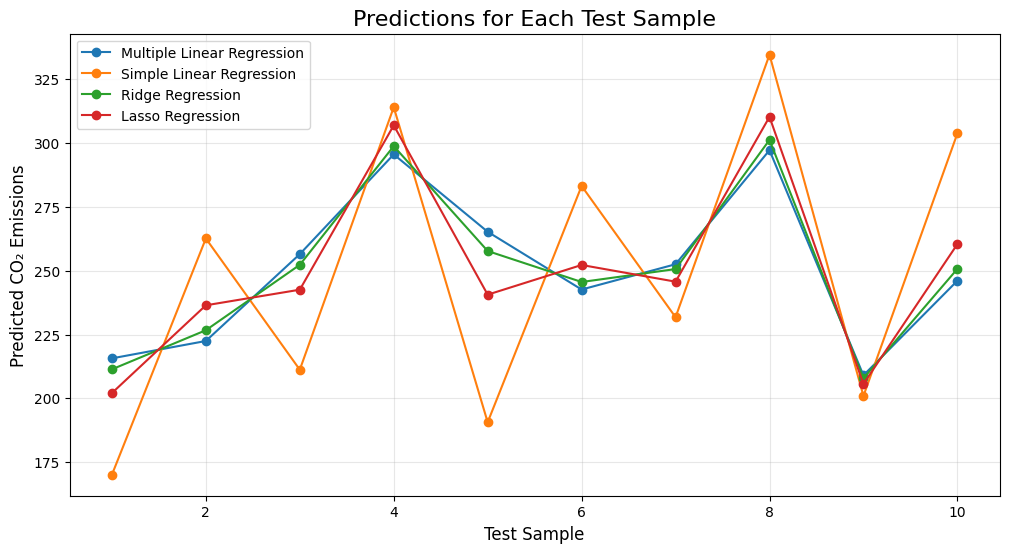

In [36]:
samples = range(1, 11)

plt.figure(figsize=(12, 6))
plt.plot(samples, predictions["Multiple Linear Regression"], marker='o', label="Multiple Linear Regression")
plt.plot(samples, predictions["Simple Linear Regression"], marker='o', label="Simple Linear Regression")
plt.plot(samples, predictions["Ridge Regression"], marker='o', label="Ridge Regression")
plt.plot(samples, predictions["Lasso Regression"], marker='o', label="Lasso Regression")
plt.title("Predictions for Each Test Sample", fontsize=16)
plt.xlabel("Test Sample", fontsize=12)
plt.ylabel("Predicted CO₂ Emissions", fontsize=12)
plt.legend()
plt.grid(alpha=0.3)
plt.show()

# Conclusion
In this project, multiple regression models were developed and evaluated to predict CO₂ emissions based on vehicle specifications and fuel consumption data. Through comprehensive analysis and comparison of models, the following insights were obtained:

#### Model Performance:

Multiple Linear Regression, Ridge Regression, and Lasso Regression demonstrated high accuracy and consistency in their predictions. These models effectively captured the relationships between features and the target variable, making them reliable for practical applications.
Simple Linear Regression, while simpler and computationally efficient, showed greater variability in predictions due to its reliance on a single feature. This limitation resulted in less accurate and sometimes erratic predictions compared to the more complex models.

#### Regularization Techniques:

The inclusion of Ridge and Lasso regression highlighted the benefits of regularization in reducing overfitting and maintaining model stability. These techniques provided comparable results to the unregularized multiple linear regression model, while offering added robustness in handling potentially collinear features.
Custom Dataset Analysis:

The use of a custom dataset allowed for direct evaluation of the models under controlled conditions. This approach highlighted the models' predictive consistency and provided insights into their behavior on unseen data.

Key Takeaways:

For scenarios requiring simplicity and interpretability, Simple Linear Regression can serve as a baseline model. However, for more complex datasets, models like Multiple Linear Regression, Ridge Regression, or Lasso Regression are recommended due to their superior performance and stability.
Regularization techniques, such as Ridge and Lasso, are particularly useful when dealing with high-dimensional data or potential multicollinearity issues.

$Final Thought$<br>
The project demonstrates the importance of selecting appropriate regression models based on the complexity of the data and the desired balance between accuracy and simplicity. Future work can focus on incorporating non-linear models, such as polynomial regression or advanced machine learning techniques, to further enhance predictive accuracy.